In [54]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

In [55]:
import quandl
data = quandl.get('BCHARTS/KRAKENUSD', returns='pandas')

In [56]:
data

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,1.315147e+04,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,1.609733e+04,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6.784250e+03,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6.780220e+03,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,1.669857e+04,890.671709
2014-01-12,899.96114,900.93989,833.00001,860.00000,25.429433,2.188088e+04,860.454846
2014-01-13,847.32152,859.99999,815.00000,835.00000,25.869127,2.152984e+04,832.260007
2014-01-14,835.00000,877.29300,805.00000,831.00000,31.662881,2.675628e+04,845.036122
2014-01-15,831.00000,864.00000,828.00000,850.00364,6.707565,5.698139e+03,849.509430


In [57]:
data.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000
mean,2258.085022,2343.844881,2163.626916,2262.286796,2223.136632,1.180697e+07,2254.158140
std,3511.130624,3667.678228,3325.345203,3513.217670,3393.201455,2.523351e+07,3495.573176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,359.989590,370.000000,350.000000,360.000000,18.564270,6.812053e+03,358.747489
50%,609.204000,616.091000,594.115000,608.256000,598.688295,3.124213e+05,608.166688
75%,2306.500500,2465.415000,2211.242000,2323.601000,3439.582731,1.287750e+07,2335.018101
max,19356.900000,19660.000000,18567.100000,19356.900000,28799.360110,1.951897e+08,19135.469160


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1663 entries, 2014-01-07 to 2018-07-27
Data columns (total 7 columns):
Open                 1663 non-null float64
High                 1663 non-null float64
Low                  1663 non-null float64
Close                1663 non-null float64
Volume (BTC)         1663 non-null float64
Volume (Currency)    1663 non-null float64
Weighted Price       1663 non-null float64
dtypes: float64(7)
memory usage: 103.9 KB


In [59]:
data.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [60]:
data.tail()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2018-07-23,7401.1,7844.9,7375.8,7720.0,5418.998820,4.162178e+07,7680.713759
2018-07-24,7719.9,8491.1,7695.0,8401.8,8311.628828,6.756209e+07,8128.621871
2018-07-25,8395.4,8496.6,8062.1,8166.0,5750.801440,4.740589e+07,8243.353311
2018-07-26,8164.7,8315.0,7840.0,7925.0,5606.024257,4.541012e+07,8100.236231
2018-07-27,7925.1,8274.8,7800.5,8241.2,5254.465823,4.204731e+07,8002.204201


In [61]:
btc_trace = go.Scatter(x=data.index, y=data['Weighted Price'], name= 'Price')
py.iplot([btc_trace])

In [62]:
data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
dtype: int64

In [63]:
data['Weighted Price'].replace(0, np.nan, inplace=True)
data['Weighted Price'].fillna(method='ffill', inplace=True)

In [64]:
data.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
dtype: int64

In [65]:
btc_trace = go.Scatter(x=data.index, y=data['Weighted Price'], name= 'Price')
py.iplot([btc_trace])

In [66]:
from sklearn.preprocessing import MinMaxScaler
values = data['Weighted Price'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[0.0339149 ],
       [0.03377341],
       [0.03337294],
       ...,
       [0.42478842],
       [0.4172304 ],
       [0.41205332]], dtype=float32)

In [67]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1164 499


In [68]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [69]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1163
498


In [70]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [71]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

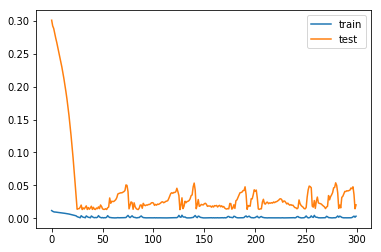

In [72]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

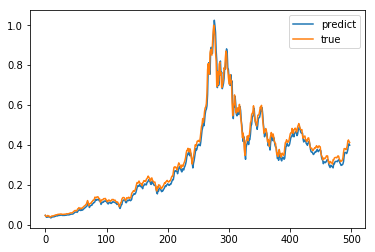

In [81]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [82]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [83]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 504.371


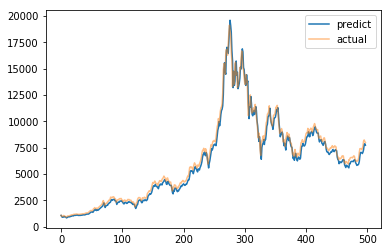

In [84]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

In [85]:
predictDates = data.tail(len(testX)).index
predictDates

DatetimeIndex(['2017-03-17', '2017-03-18', '2017-03-19', '2017-03-20',
               '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24',
               '2017-03-25', '2017-03-26',
               ...
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21',
               '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25',
               '2018-07-26', '2018-07-27'],
              dtype='datetime64[ns]', name='Date', length=498, freq=None)

In [86]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

In [87]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])


In [101]:
testY_reshape

array([ 1093.634  ,   991.66125,   998.3927 ,  1015.3101 ,  1077.906  ,
        1041.6042 ,  1033.5149 ,   973.84454,   922.35223,   961.44476,
        1003.0308 ,  1042.2115 ,  1033.6735 ,  1035.8488 ,  1063.5583 ,
        1087.0469 ,  1100.9185 ,  1136.3949 ,  1145.0701 ,  1130.5178 ,
        1172.5028 ,  1192.9753 ,  1187.8942 ,  1199.7253 ,  1210.4067 ,
        1218.378  ,  1220.625  ,  1185.7474 ,  1187.0522 ,  1187.1757 ,
        1182.9031 ,  1191.7334 ,  1208.2518 ,  1204.7965 ,  1228.6816 ,
        1245.488  ,  1236.5826 ,  1238.509  ,  1246.381  ,  1266.7942 ,
        1294.9512 ,  1320.114  ,  1323.0646 ,  1327.1606 ,  1328.5194 ,
        1383.0753 ,  1431.488  ,  1478.4691 ,  1540.5974 ,  1549.1001 ,
        1546.1246 ,  1508.6895 ,  1588.9666 ,  1709.213  ,  1747.9733 ,
        1828.4283 ,  1741.5272 ,  1694.2606 ,  1786.3225 ,  1736.634  ,
        1745.1613 ,  1824.5612 ,  1880.3578 ,  1925.7842 ,  1991.3531 ,
        2032.2676 ,  2100.7937 ,  2160.5413 ,  2341.5466 ,  2492

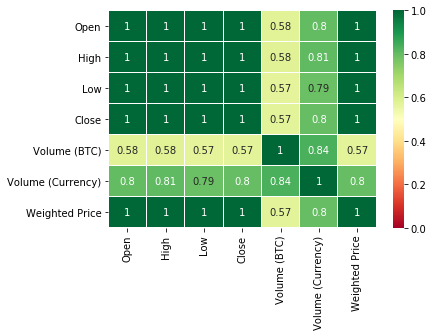

In [88]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [89]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [90]:
values = data[['Weighted Price'] + ['Volume (BTC)'] + ['Volume (Currency)']].values
values = values.astype('float32')

In [91]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [92]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
1,0.033915,0.000542,0.000067,0.033773,0.000666,0.000082
2,0.033773,0.000666,0.000082,0.033373,0.000283,0.000035
3,0.033373,0.000283,0.000035,0.034079,0.000279,0.000035
4,0.034079,0.000279,0.000035,0.036494,0.000651,0.000086
5,0.036494,0.000651,0.000086,0.034898,0.000883,0.000112


In [93]:
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.033915   0.000542   0.000067  0.033773
2   0.033773   0.000666   0.000082  0.033373
3   0.033373   0.000283   0.000035  0.034079
4   0.034079   0.000279   0.000035  0.036494
5   0.036494   0.000651   0.000086  0.034898


In [94]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1163, 1, 3) (1163,) (499, 1, 3) (499,)


In [95]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

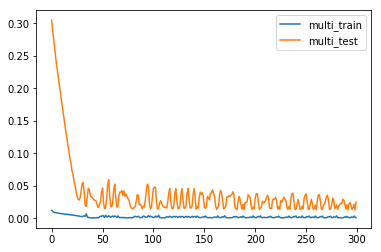

In [96]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()

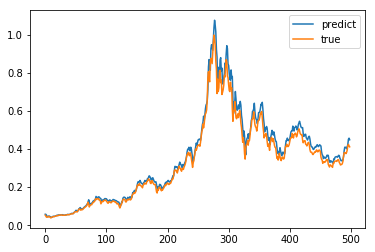

In [97]:
yhat = multi_model.predict(test_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

In [98]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [99]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 695.634


In [100]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, multi_predict_chart, actual_chart])

## LSTM with single feature of Weighted Price have Test RMSE: 944.813.

## LSTM with features of Volume(BTC), Volume(Currency) and Weighted Price have Test RMSE: 479.672.

## LSTM with multi features shows more accurate results as show in line chart above.


#Blockchain with #ArtificialIntelligence.

This is my first #Blockchain and #Bitcoin_Price_Prediction on #Market_Data (first post as well). Where I  implemented #LSTM using #Keras API with #Tensorflow as backend.

Basically, it is Time Series data of Market from #Kraken_Exchange.  Soon I will come with Blockchain Architecture Design and #Code as well. Please #stay_tune.

Here i presented some graphs and files of my project.



